In [1]:
import pandas as pd
import numpy as np
import joblib
import os

In [2]:
train_01 = joblib.load('../../3.HA_model/1.PCA_T2/train_HA_feature/train_01.lz4')
train_02 = joblib.load('../../3.HA_model/1.PCA_T2/train_HA_feature/train_02.lz4')
train_03 = joblib.load('../../3.HA_model/1.PCA_T2/train_HA_feature/train_03.lz4')

test_01 = joblib.load('../../3.HA_model/1.PCA_T2/test_HA_feature/test_01.lz4')
test_02 = joblib.load('../../3.HA_model/1.PCA_T2/test_HA_feature/test_02.lz4')
test_03 = joblib.load('../../3.HA_model/1.PCA_T2/test_HA_feature/test_03.lz4')
test_04 = joblib.load('../../3.HA_model/1.PCA_T2/test_HA_feature/test_04.lz4')
test_05 = joblib.load('../../3.HA_model/1.PCA_T2/test_HA_feature/test_05.lz4')

In [3]:
# 训练数据经过剪切了
train = pd.concat([train_01, train_02, train_03], axis=0)
y_train = train[['RULR']]
use_cols = ['PCA_T2__mean', 'PCA_T2__mean_diff', 'PCA_T2__delta', 'PCA_T2__delta_diff']
x_train = train[use_cols]

test = pd.concat([test_01, test_02, test_03, test_04, test_05], axis=0)
use_cols = ['PCA_T2__mean', 'PCA_T2__mean_diff', 'PCA_T2__delta', 'PCA_T2__delta_diff']
x_test = test[use_cols]

In [4]:
from xgboost.sklearn import XGBRegressor
params = {'maxdepth': 6, 'learning_rate': 0.1, 'n_estimators': 300, 'objective': 'reg:linear',
         'booster': 'gbtree', 'n_jobs': 8, 'reg_lambda': 5, 'random_state ':2018}

xgb = XGBRegressor(**params)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, maxdepth=6, min_child_weight=1, missing=None,
       n_estimators=300, n_jobs=8, nthread=None, objective='reg:linear',
       random_state=0, random_state =2018, reg_alpha=0, reg_lambda=5,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

In [5]:
# 1.avg
RULR = xgb.predict(x_test).reshape(-1,)
CLR = 1 - RULR
CL = test['CL'].values
# [0.335, 0.5125, 0.2585, 0.5105, 0.6905] 为5个test文件的时间片段内的真实剩余寿命（RULR）取平均值
# 以下代码用于计算预测的平均剩余寿命与真实平均剩余寿命的mae值
# residual = avg - np.array([0.335, 0.5125, 0.2585, 0.5105, 0.6905])
# np.abs(residual).sum()/5

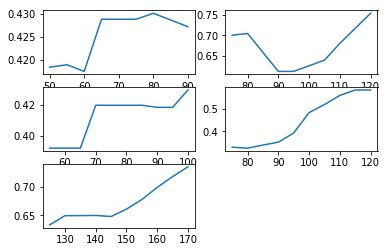

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(3,2,1)
plt.plot(CL[:8],CLR[:8])

plt.subplot(3,2,2)
plt.plot(CL[8:15],CLR[8:15])

plt.subplot(3,2,3)
plt.plot(CL[15:25],CLR[15:25])

plt.subplot(3,2,4)
plt.plot(CL[25:35],CLR[25:35])

plt.subplot(3,2,5)
plt.plot(CL[35:45],CLR[35:45])